In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 数据准备

In [2]:
dataset_dir = 'data'

train_data = pd.read_csv(Path(dataset_dir).joinpath('fake_job_postings_train.csv'))
test_data = pd.read_csv(Path(dataset_dir).joinpath('fake_job_postings_test.csv'))

columns = [col for col in train_data.columns]
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               9999 non-null   object
 1   title                9999 non-null   object
 2   location             9801 non-null   object
 3   department           3611 non-null   object
 4   salary_range         1606 non-null   object
 5   company_profile      8114 non-null   object
 6   description          9999 non-null   object
 7   requirements         8433 non-null   object
 8   benefits             5915 non-null   object
 9   telecommuting        9999 non-null   int64 
 10  has_company_logo     9999 non-null   int64 
 11  has_questions        9999 non-null   int64 
 12  employment_type      8007 non-null   object
 13  required_experience  6039 non-null   object
 14  required_education   5451 non-null   object
 15  industry             7218 non-null   object
 16  functi

In [3]:
train_data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,00100eff19844c0190df4c5e11f4c066,Office Manager / HR,"GB, LND,",NaN,NaN,NaN,"Based in the heart of the City, this exception...",You will have previous experience in running a...,Excellent Salaries Company Benefit PackagesInt...,0,1,0,Full-time,NaN,Bachelor's Degree,Retail,NaN,0
1,0012cf527c5740999d1c6545dce5cd95,Director of Account Management,"US, CA, San Francisco",NaN,NaN,NaN,The Director of Account Management brings stro...,8+ years experience in an account management a...,NaN,0,0,1,NaN,NaN,NaN,NaN,NaN,0
2,0013e2bf9f6548c5b214853f9134b005,Brand Manager [Contract position],"US, , Boise",Account team,NaN,Since 1978Our goal has been to create engaging...,Drake Cooper Brand Managers help clients grow ...,Education: BS/BA degree in advertising / mar...,ABOUT DRAKE COOPERWe are a Northwest U.S. adve...,0,1,0,Contract,Associate,Bachelor's Degree,Marketing and Advertising,Advertising,0
3,001493eaf7684ba693d9c1294e12787b,Web Developer,"GR, ,",NaN,NaN,We are a technology focused company with an es...,This position is for a talented PHP/MYSQL/JQue...,"Solid object-oriented design, programming, and...",NaN,0,1,0,Full-time,Mid-Senior level,NaN,E-Learning,NaN,0
4,0014e3ba40af422981a8d30e96a34cb1,Performance Improvement Director,"US, ,",NaN,NaN,NaN,Oversees implementation and operation of Perfo...,Quality-oriented consulting company with a foc...,Full-time position.Quality benefits package of...,0,0,0,Full-time,Director,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


# 处理缺失数据

In [4]:
print(train_data.isnull().sum())

job_id                    0
title                     0
location                198
department             6388
salary_range           8393
company_profile        1885
description               0
requirements           1566
benefits               4084
telecommuting             0
has_company_logo          0
has_questions             0
employment_type        1992
required_experience    3960
required_education     4548
industry               2781
function               3654
fraudulent                0
dtype: int64


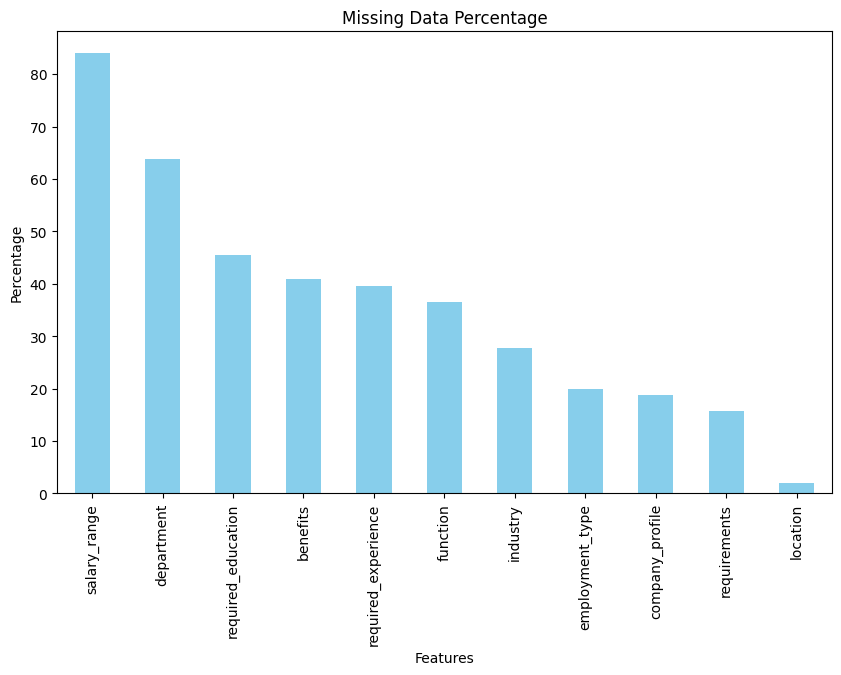

In [5]:
missing_percent = (train_data.isnull().sum() / len(train_data)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
missing_percent.plot(kind='bar', color='skyblue')
plt.title('Missing Data Percentage')
plt.xlabel('Features')
plt.ylabel('Percentage')
plt.show()

In [6]:
text_columns = ['title', 'company_profile', 'description', 'requirements', 'benefits']
train_data[text_columns] = train_data[text_columns].fillna('Missing')
info_columns = ['location', 'salary_range', 'department', 'required_education', 'required_experience', 'employment_type', 'industry', 'function']
train_data[info_columns] = train_data[info_columns].fillna('Unknown')

train_data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,00100eff19844c0190df4c5e11f4c066,Office Manager / HR,"GB, LND,",Unknown,Unknown,Missing,"Based in the heart of the City, this exception...",You will have previous experience in running a...,Excellent Salaries Company Benefit PackagesInt...,0,1,0,Full-time,Unknown,Bachelor's Degree,Retail,Unknown,0
1,0012cf527c5740999d1c6545dce5cd95,Director of Account Management,"US, CA, San Francisco",Unknown,Unknown,Missing,The Director of Account Management brings stro...,8+ years experience in an account management a...,Missing,0,0,1,Unknown,Unknown,Unknown,Unknown,Unknown,0
2,0013e2bf9f6548c5b214853f9134b005,Brand Manager [Contract position],"US, , Boise",Account team,Unknown,Since 1978Our goal has been to create engaging...,Drake Cooper Brand Managers help clients grow ...,Education: BS/BA degree in advertising / mar...,ABOUT DRAKE COOPERWe are a Northwest U.S. adve...,0,1,0,Contract,Associate,Bachelor's Degree,Marketing and Advertising,Advertising,0
3,001493eaf7684ba693d9c1294e12787b,Web Developer,"GR, ,",Unknown,Unknown,We are a technology focused company with an es...,This position is for a talented PHP/MYSQL/JQue...,"Solid object-oriented design, programming, and...",Missing,0,1,0,Full-time,Mid-Senior level,Unknown,E-Learning,Unknown,0
4,0014e3ba40af422981a8d30e96a34cb1,Performance Improvement Director,"US, ,",Unknown,Unknown,Missing,Oversees implementation and operation of Perfo...,Quality-oriented consulting company with a foc...,Full-time position.Quality benefits package of...,0,0,0,Full-time,Director,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


# 特征选择

In [7]:
import re

def preprocess_text(text: str) -> str:
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

for col in text_columns:
    train_data[col] = train_data[col].apply(preprocess_text)

train_data['text'] = train_data[text_columns].agg(' '.join, axis=1)

train_data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,text
0,00100eff19844c0190df4c5e11f4c066,office manager hr,"GB, LND,",Unknown,Unknown,missing,based in the heart of the city this exceptiona...,you will have previous experience in running a...,excellent salaries company benefit packagesint...,0,1,0,Full-time,Unknown,Bachelor's Degree,Retail,Unknown,0,office manager hr missing based in the hear...
1,0012cf527c5740999d1c6545dce5cd95,director of account management,"US, CA, San Francisco",Unknown,Unknown,missing,the director of account management brings stro...,years experience in an account management and...,missing,0,0,1,Unknown,Unknown,Unknown,Unknown,Unknown,0,director of account management missing the dir...
2,0013e2bf9f6548c5b214853f9134b005,brand manager contract position,"US, , Boise",Account team,Unknown,since our goal has been to create engaging bra...,drake cooper brand managers help clients grow ...,education bsba degree in advertising market...,about drake cooperwe are a northwest us advert...,0,1,0,Contract,Associate,Bachelor's Degree,Marketing and Advertising,Advertising,0,brand manager contract position since our goal...
3,001493eaf7684ba693d9c1294e12787b,web developer,"GR, ,",Unknown,Unknown,we are a technology focused company with an es...,this position is for a talented phpmysqljquery...,solid objectoriented design programming and de...,missing,0,1,0,Full-time,Mid-Senior level,Unknown,E-Learning,Unknown,0,web developer we are a technology focused comp...
4,0014e3ba40af422981a8d30e96a34cb1,performance improvement director,"US, ,",Unknown,Unknown,missing,oversees implementation and operation of perfo...,qualityoriented consulting company with a focu...,fulltime positionquality benefits package offered,0,0,0,Full-time,Director,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,performance improvement director missing overs...


# 离散值向量化

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tfidfvectorizer = TfidfVectorizer(max_features=5000)

# Train-Test Split
X = train_data['text']
y = train_data['fraudulent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
print(len(X_train), len(X_test))

8999 1000


In [ ]:
X_train_tfidf = tfidfvectorizer.fit_transform(X_train)
X_test_tfidf = tfidfvectorizer.transform(X_test)
print(X_train_tfidf.toarray()) # 向量化后的训练集
print(tfidfvectorizer.get_feature_names_out()) # tfidfvectorizer构建的词表

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['aan' 'ab' 'abc' ... 'τις' 'το' 'του']


# 过采样

In [10]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train_tfidf, y_train)

smote_class_distribution = pd.Series(y_smote).value_counts(normalize=True)
smote_class_distribution

fraudulent
0    0.5
1    0.5
Name: proportion, dtype: float64

# 训练模型

In [11]:
from sklearn.ensemble import RandomForestClassifier

# 随机森林构建
model = RandomForestClassifier(random_state=42)
model.fit(X_smote, y_smote) 

RandomForestClassifier(random_state=42)

In [13]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_tfidf)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       951
           1       1.00      0.53      0.69        49

    accuracy                           0.98      1000
   macro avg       0.99      0.77      0.84      1000
weighted avg       0.98      0.98      0.97      1000



In [14]:
from sklearn.linear_model import LogisticRegression

# 逻辑回归
model = LogisticRegression(random_state=42)
model.fit(X_smote, y_smote)

LogisticRegression(random_state=42)

In [15]:
y_pred = model.predict(X_test_tfidf)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       951
           1       0.69      0.86      0.76        49

    accuracy                           0.97      1000
   macro avg       0.84      0.92      0.87      1000
weighted avg       0.98      0.97      0.98      1000



In [16]:
from sklearn.svm import SVC

# SVM
model = SVC(kernel='linear', random_state=42)
model.fit(X_smote, y_smote)

SVC(kernel='linear', random_state=42)

In [18]:
y_pred = model.predict(X_test_tfidf)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       951
           1       0.83      0.78      0.80        49

    accuracy                           0.98      1000
   macro avg       0.91      0.88      0.90      1000
weighted avg       0.98      0.98      0.98      1000



In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class BinaryClassification(nn.Module):
    def __init__(self, n_feature: int, n_hidden: int, n_output: int) -> None:
        super(BinaryClassification, self).__init__()
        # 构建传输到隐层的fc
        self.fc1 = nn.Linear(n_feature, n_hidden)
        # 构建输出层
        self.fc2 = nn.Linear(n_hidden, n_feature)

    def forward(self, x: torch.FloatTensor):
        if not isinstance(x, torch.FloatTensor):
            x = torch.FloatTensor(x)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        print(x.shape)
        return x

    def predict(self, x):
        pred = F.softmax(self.forward(x), dim=1)

        ans = []
        for t in pred:
           if t[0] > t[1]:
               ans.append(0) 
           else:
               ans.append(1)

        return torch.tensor(ans)

In [46]:
if torch.cuda.is_available():
    device = torch.device('cuda')
    cudnn.benchmark = True
else:
    device = torch.device('cpu')

# 数据集和模型准备
X_tensor = torch.from_numpy(X_smote.toarray()).type(torch.FloatTensor)
y_tensor = torch.from_numpy(np.array(y_smote)).type(torch.LongTensor)
model = BinaryClassification(X_tensor.shape[1], 20, 2)

# 定义损失函数
loss_criterion = nn.CrossEntropyLoss()
# 定义优化器
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [49]:
# 模型训练
epochs = 1000
losses = []

for i in range(epochs):
    #得到预测值
    y_pred = model.forward(X_tensor)
    #计算当前的损失
    loss = loss_criterion(y_pred, y_tensor)
    #添加当前的损失到losses中
    losses.append(loss.item())
    #清除之前的梯度
    optimizer.zero_grad()
    #反向传播更新参数
    loss.backward()
    #梯度优化
    optimizer.step()
    if(i % 500 == 0):
        print('loss: {:.4f}'.format(loss.item()))

loss: 8.4518
loss: 0.0003


50
1000


ValueError: x and y must have same first dimension, but have shapes (50,) and (1000,)

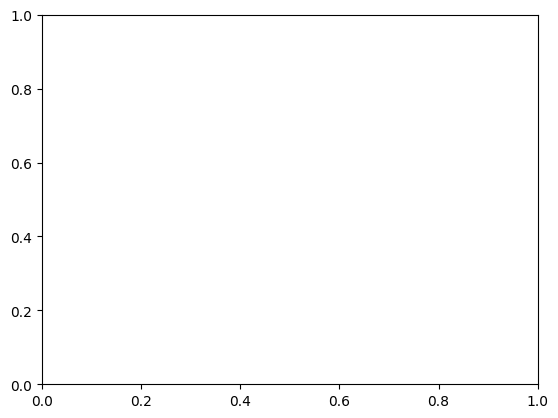

In [55]:
epoch_list = np.linspace(1, 1000)
print(len(epoch_list))
print(len(losses))
plt.plot(epoch_list, losses)
plt.show()

# 测试赛题

In [ ]:
test_data[text_columns] = test_data[text_columns].fillna("Missing")
test_data[info_columns] = test_data[info_columns].fillna("Unknown")

for col in text_columns:
    test_data[col] = test_data[col].apply(preprocess_text)

test_data['text'] = test_data[text_columns].agg(' '.join, axis=1)

test_data

In [14]:
job_id = test_data['job_id']


pred = model.predict(tfidfvectorizer.transform(test_data['text']))
pred_distribution = pd.Series(pred).value_counts()
pred_distribution

0    7657
1     224
Name: count, dtype: int64

# 导出实验结果

In [22]:
ans_df = pd.concat([job_id, pd.Series(pred)], axis=1).rename(columns={0: 'pred'})
ans_df.to_csv('predict.csv', index=False)